In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
def generuj_proces_poissona(T, lambda_):
    t = 0
    Nt = 0
    trajektoria = []
    while t < T:
        delta_t = np.random.exponential(1/lambda_)
        t += delta_t
        if t < T:
            Nt += 1
            trajektoria.append(t)
    return np.array(trajektoria)

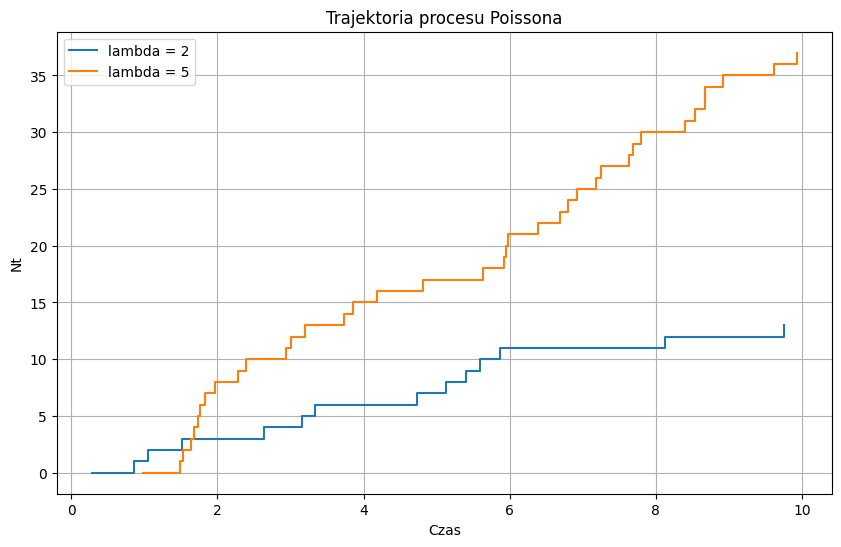

In [6]:
T = 10  # Czas końcowy
lambda1 = 2  # Intensywność procesu Poissona
lambda2 = 4

# Generowanie trajektorii procesu Poissona
trajektoria1 = generuj_proces_poissona(T, lambda1)
trajektoria2 = generuj_proces_poissona(T, lambda2)

# Wykres
plt.figure(figsize=(10, 6))
plt.step(trajektoria1, np.arange(len(trajektoria1)), where='post', label='lambda = 2')
plt.step(trajektoria2, np.arange(len(trajektoria2)), where='post', label='lambda = 5')
plt.xlabel('Czas')
plt.ylabel('Nt')
plt.title('Trajektoria procesu Poissona')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
def N_t(poiss, T):
    p = np.asarray(poiss)
    n = np.cumsum(p <= np.expand_dims(T, axis=1), axis=1).max(axis=1)
    return n


In [12]:
lista1 = np.zeros(100)
lista2 = np.zeros(100)

for i in range(100):
    p1 = generuj_proces_poissona(T, lambda1)
    p2 = generuj_proces_poissona(T, lambda2)
    lista1[i] = N_t(p1, [5])[0]
    lista2[i] = N_t(p2, [5])[0]

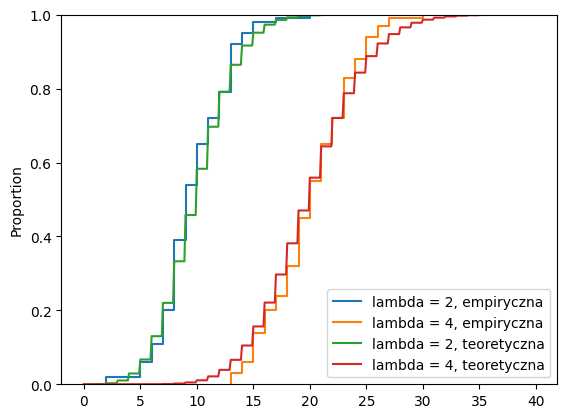

In [18]:
sns.ecdfplot(lista1, label="lambda = 2, empiryczna")
sns.ecdfplot(lista2, label="lambda = 4, empiryczna")

t = np.arange(0, 40, 0.1)

plt.plot(t, poisson.cdf(t, 10), label="lambda = 2, teoretyczna")
plt.plot(t, poisson.cdf(t, 20), label="lambda = 4, teoretyczna")

plt.legend()